In [1]:
#imports cell
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data_mall = pd.read_csv('Mall_Customers.csv')

In [3]:
data_mall.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
74,75,Male,59,54,47
6,7,Female,35,18,6
136,137,Female,44,73,7
151,152,Male,39,78,88
176,177,Male,58,88,15
124,125,Female,23,70,29
148,149,Female,34,78,22
97,98,Female,27,60,50
45,46,Female,24,39,65
119,120,Female,50,67,57


In [4]:
data_mall.shape

(200, 5)

In [5]:
# change Col Name
replaced_colname = ['cust_id', 'gender', 'age', 'income', 'spending']
colname = data_mall.columns.tolist()
dict_colname = dict(zip(colname, replaced_colname))

data_mall = data_mall.rename(columns=dict_colname)

In [6]:
data_mall.head()

,cust_id,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Simple exploration

In [7]:
# Gender 
data_mall.gender.value_counts()

gender
Female    112
Male       88
Name: count, dtype: int64

In [8]:
# Age
data_mall.age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: age, dtype: float64

In [9]:
data_mall.income.describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: income, dtype: float64

In [10]:
data_mall.spending.describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: spending, dtype: float64

<Axes: ylabel='Frequency'>

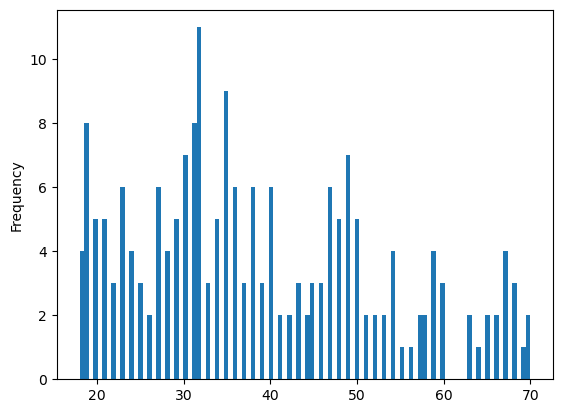

In [11]:
# Histogram
data_mall.age.plot(kind='hist', bins=100)

In [12]:

data_mall.head()

,cust_id,gender,age,income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 1st Trials

In [13]:
X = data_mall[['age', 'income', 'spending']]

In [14]:
Km = KMeans(n_clusters=4)

In [15]:
Km.fit(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [16]:
data_mall['clus1'] = Km.predict(X)


In [17]:
data_mall.sample(4)

,cust_id,gender,age,income,spending,clus1
44,45,Female,49,39,28,1
183,184,Female,29,98,88,2
190,191,Female,34,103,23,3
78,79,Female,23,54,52,1


<Axes: xlabel='age', ylabel='spending'>

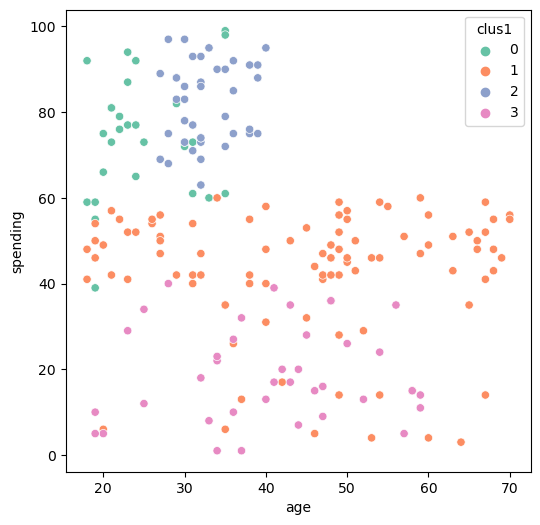

In [18]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data_mall, palette='Set2', x='age', y='spending', hue='clus1')

### PCA

In [19]:
pca_model = PCA(n_components=2)
pca_model.fit(X)

PCA(n_components=2)

In [20]:
data_mall[['pca_1', 'pca_2']] = pd.DataFrame(pca_model.transform(X))

In [21]:
data_mall.sample(5)

,cust_id,gender,age,income,spending,clus1,pca_1,pca_2
153,154,Female,38,78,76,2,30.705237,-0.820218
55,56,Male,47,43,41,1,-19.107844,-7.847706
107,108,Male,54,63,46,1,-4.727860,6.366997
97,98,Female,27,60,50,1,1.752506,-1.889845
146,147,Male,48,77,36,3,-3.213006,22.637601


<Axes: xlabel='pca_1', ylabel='pca_2'>

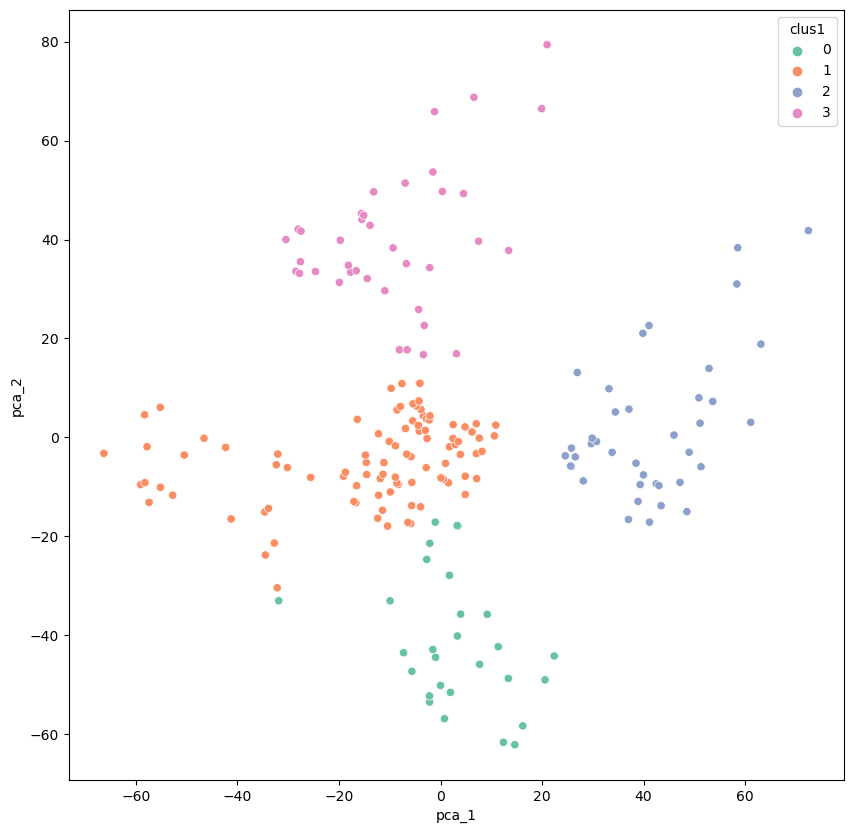

In [22]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_mall, palette='Set2', x='pca_1', y='pca_2', hue='clus1')

In [23]:
K_list=list(np.arange(2,20))
K_list

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [24]:
data_eval = []
for k in K_list:
    km = KMeans(n_clusters=k)
    km.fit(X)
    class_result = km.predict(X)
    ss = silhouette_score(X, class_result)
    data_eval.append([k, ss])
data_eval

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[[2, 0.293166070535953],
 [3, 0.3839349967742105],
 [4, 0.40546302077733304],
 [5, 0.44045315045641703],
 [6, 0.4523443947724053],
 [7, 0.4403070674884399],
 [8, 0.42627498428462474],
 [9, 0.38481393087916216],
 [10, 0.388498887978224],
 [11, 0.37383560540259386],
 [12, 0.35226874790305146],
 [13, 0.3476208773677054],
 [14, 0.34105092926958414],
 [15, 0.35767356434347775],
 [16, 0.3517905431805397],
 [17, 0.33458954846812344],
 [18, 0.34397089484945015],
 [19, 0.3435065333337395]]

In [25]:
df_data_eval = pd.DataFrame(data_eval,columns=['k','silhouette'])
df_data_eval.index = df_data_eval['k']

<Axes: xlabel='k'>

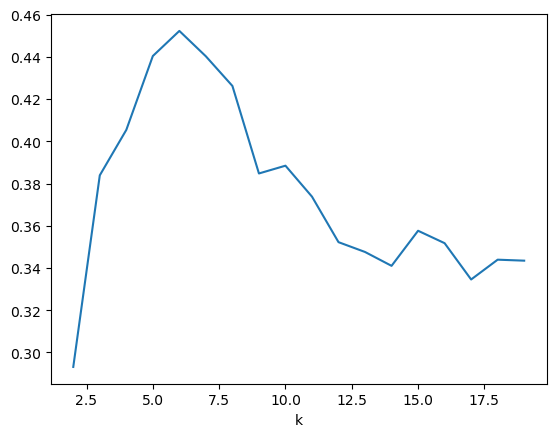

In [26]:
df_data_eval.silhouette.plot()

In [27]:
# Retrain using K = 6
km_1 = KMeans(n_clusters=5)
km_1.fit(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [28]:
data_mall['clus_2'] = km_1.predict(X)

In [29]:
data_mall.sample(5)

,cust_id,gender,age,income,spending,clus1,pca_1,pca_2,clus_2
104,105,Male,49,62,56,1,3.488335,-0.835341,4
146,147,Male,48,77,36,3,-3.213006,22.637601,2
53,54,Male,59,43,60,1,-6.441601,-17.180482,4
86,87,Female,55,57,58,1,0.983277,-5.239255,4
83,84,Female,46,54,44,1,-10.085829,-0.808279,4


<Axes: xlabel='income', ylabel='spending'>

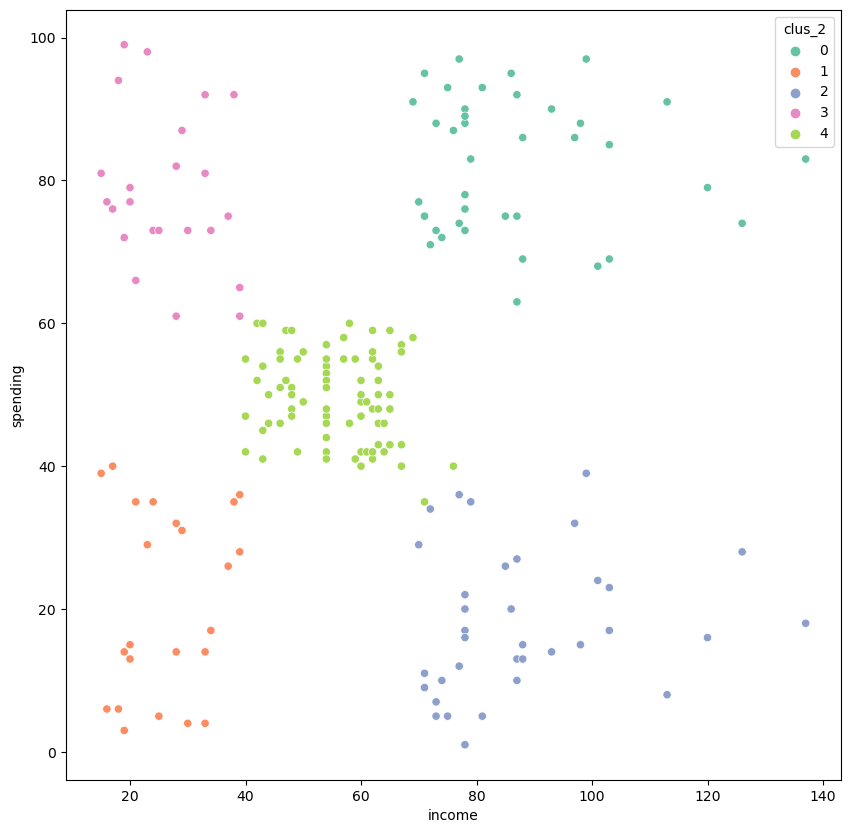

In [30]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_mall, palette='Set2', x='income', y='spending', hue='clus_2')

<Axes: xlabel='pca_1', ylabel='pca_2'>

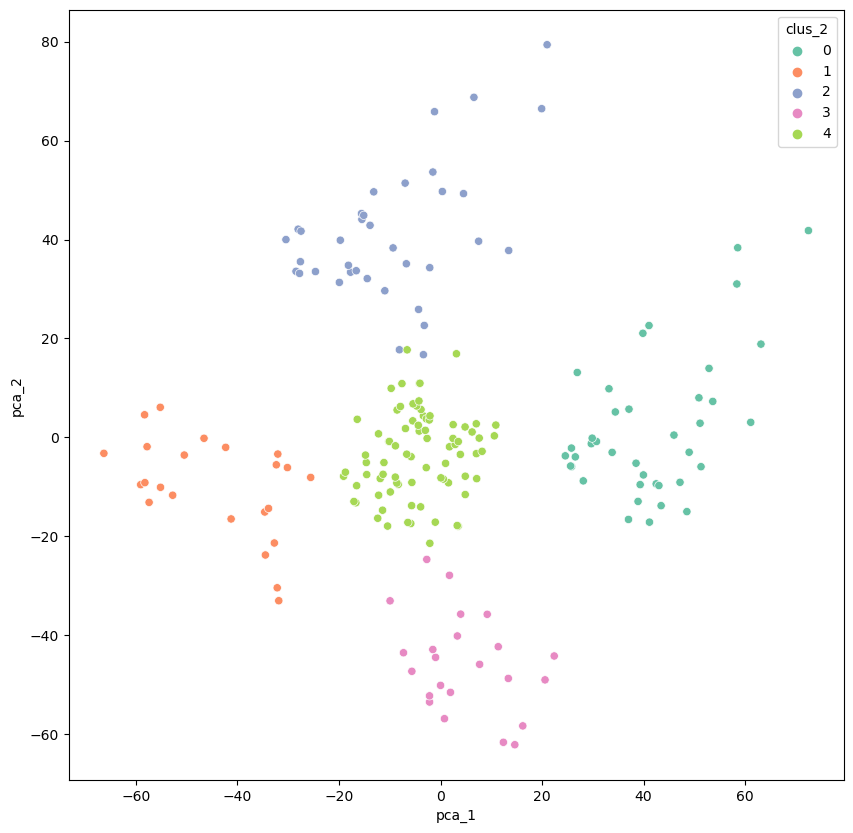

In [31]:
# 6 Clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_mall, palette='Set2', x='pca_1', y='pca_2', hue='clus_2')

In [32]:
data_intp = data_mall.groupby('clus_2')[['age', 'income','spending']].mean()
data_intp

,age,income,spending
clus_2,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,40.666667,87.750000,17.583333
3,25.521739,26.304348,78.565217
4,43.088608,55.291139,49.569620


<Figure size 1000x1000 with 0 Axes>

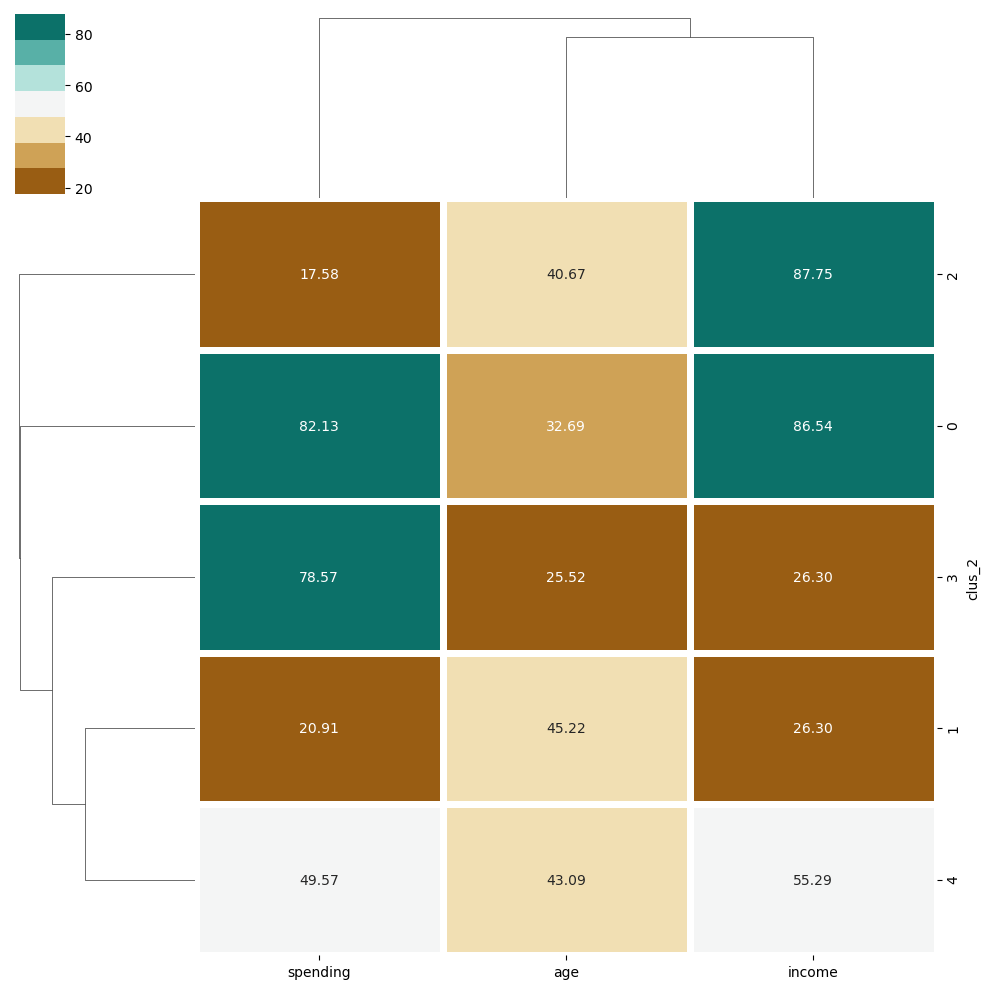

In [43]:
plt.figure(figsize=(10,10))
sns.clustermap(data_intp, annot=True, linewidths=5, fmt='.2f', cmap=sns.color_palette('BrBG',7))

In [34]:
# Standard scalling
scale_mod = StandardScaler()

In [35]:
scale_mod.fit(X)


StandardScaler()

In [36]:
data_mall[['age_s', 'income_s', 'spending_s']] = pd.DataFrame(scale_mod.transform(X))

In [42]:
data_mall.sample(10)

,cust_id,gender,age,income,spending,clus1,pca_1,pca_2,clus_2,age_s,income_s,spending_s
13,14,Female,24,20,77,0,-0.004307,-50.113437,3,-1.065735,-1.548152,1.040418
86,87,Female,55,57,58,1,0.983277,-5.239255,4,1.159032,-0.135883,0.302808
123,124,Male,39,69,91,2,37.008441,-16.573338,0,0.010765,0.322150,1.583920
91,92,Male,18,59,41,1,-4.209336,1.288314,4,-1.496335,-0.059544,-0.357158
165,166,Female,36,85,75,2,34.417676,5.150395,0,-0.204535,0.932861,0.962775
83,84,Female,46,54,44,1,-10.085829,-0.808279,4,0.513132,-0.250391,-0.240694
184,185,Female,41,99,39,3,13.417905,37.783370,2,0.154298,1.467233,-0.434801
90,91,Female,68,59,55,1,-2.654095,-0.198216,4,2.091999,-0.059544,0.186343
70,71,Male,70,49,55,1,-8.918453,-8.020043,4,2.235532,-0.441239,0.186343
110,111,Male,65,63,52,1,-2.090598,4.364132,4,1.876699,0.093133,0.069879


In [38]:
data_mall[['age_s', 'income_s', 'spending_s']].std()

age_s         1.002509
income_s      1.002509
spending_s    1.002509
dtype: float64

In [39]:
data_intp2 = data_mall.groupby('clus_2')[['age_s', 'income_s','spending_s']].mean()
data_intp2

,age_s,income_s,spending_s
clus_2,,,
0,-0.441917,0.991583,1.239503
1,0.456967,-1.307519,-1.136965
2,0.130376,1.037827,-1.266230
3,-0.956525,-1.307519,1.101182
4,0.304191,-0.201109,-0.024472


<Figure size 1000x1000 with 0 Axes>

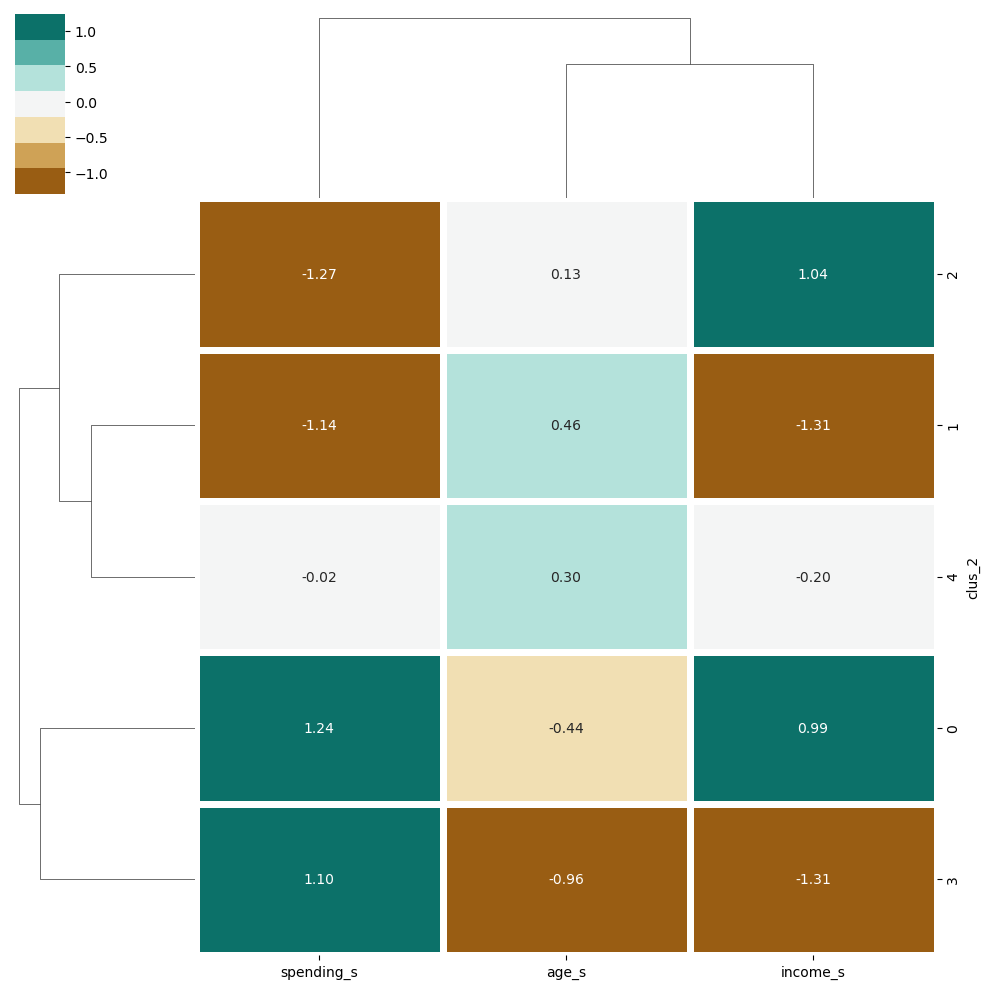

In [40]:
plt.figure(figsize=(10,10))
sns.clustermap(data_intp2, annot=True, linewidths=5, fmt='.2f', cmap=sns.color_palette('BrBG',7))